In this scenario, we need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows:

Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the 
following conditions: 

((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0))

Attribute Information:

Listing of attributes: >50K, <=50K.
1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier#, plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import pickle
sns.set()
%matplotlib inline

In [2]:
#!pip install xgboost

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)
train_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [5]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
              'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 
              'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
train_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
test_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [9]:
test_set.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [10]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [11]:
#combine train_set and test_set for EDA purposes
adult = pd.concat([train_set, test_set], axis=0)
adult.reset_index(inplace=True)
adult.drop('index', axis=1, inplace=True)
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [12]:
adult.duplicated().sum()

29

In [13]:
duplicates = adult[adult.duplicated()]
duplicates

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [14]:
# drop duplicates
adult.drop_duplicates(inplace=True)
adult.reset_index(inplace=True)
adult.drop('index', axis=1, inplace=True)
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48808,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48809,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48810,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48811,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# EDA

### Dummy Variables (for categorical vars)

In [15]:
adult.columns.values
#categorical vars --> 'wage_class', 'workclass', 'education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'

array(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'], dtype=object)

In [16]:
cat_cols = ['wage_class', 'workclass', 'education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

In [17]:
adult['wage_class'].unique()
# merge classes (issue caused by typos)

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [18]:
adult['wage_class'] = adult.wage_class.apply(lambda x: x[:-1] if x[-1] == '.' else x)
adult['wage_class'].unique()
# discrepancy resolved

array([' <=50K', ' >50K'], dtype=object)

In [19]:
adult_mod = pd.get_dummies(adult, columns=cat_cols, drop_first=True)
adult_mod

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class_ >50K,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48808,39,215419,13,0,0,36,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48809,64,321403,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48810,38,374983,13,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48811,44,83891,13,5455,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# continuous vars only (excluding target var)
corr_ = adult_mod.corr()
corr_.columns.values

array(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'wage_class_ >50K', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Without-pay', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc',
       'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ Adm-clerical',
    

In [21]:
corr_

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class_ >50K,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
age,1.000000,-0.076474,0.030760,0.077221,0.056908,0.071322,0.230335,0.049840,0.057888,-0.019576,...,0.007008,0.005460,0.012280,-0.001956,-0.011887,-0.001774,0.001050,0.011612,-0.012353,0.002900
fnlwgt,-0.076474,1.000000,-0.038798,-0.003713,-0.004375,-0.013516,-0.006376,-0.010005,0.001224,0.003438,...,-0.013582,0.008708,-0.006525,-0.010347,-0.001735,-0.001513,0.004153,-0.070463,-0.007482,0.004700
education_num,0.030760,-0.038798,1.000000,0.125186,0.080969,0.143872,0.332746,0.058066,0.097207,-0.014362,...,-0.047853,-0.041814,0.000902,0.012980,0.045438,0.007281,-0.010212,0.103693,-0.007558,-0.005807
capital_gain,0.077221,-0.003713,0.125186,1.000000,-0.031460,0.082154,0.223014,-0.003648,-0.009894,-0.002073,...,-0.004358,-0.006143,-0.002319,0.003902,0.004256,-0.002783,-0.003041,0.004154,-0.002677,-0.000476
capital_loss,0.056908,-0.004375,0.080969,-0.031460,1.000000,0.054440,0.147527,0.009199,0.009470,-0.003109,...,-0.008052,0.002628,-0.004506,0.005631,0.003073,-0.002341,0.004025,0.009396,-0.000123,-0.004716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native_country_ Thailand,-0.001774,-0.001513,0.007281,-0.002783,-0.002341,0.008556,-0.004226,-0.004311,-0.003126,-0.000355,...,-0.000919,-0.001525,-0.000514,-0.001205,-0.000906,1.000000,-0.000583,-0.073383,-0.001042,-0.000538
native_country_ Trinadad&Tobago,0.001050,0.004153,-0.010212,-0.003041,0.004025,-0.002917,-0.009114,0.001074,0.000943,-0.000337,...,-0.000872,-0.001447,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069615,-0.000988,-0.000511
native_country_ United-States,0.011612,-0.070463,0.103693,0.004154,0.009396,0.004615,0.032392,0.013918,0.034826,0.004837,...,-0.109708,-0.182026,-0.061391,-0.143802,-0.108056,-0.073383,-0.069615,1.000000,-0.124319,-0.064250
native_country_ Vietnam,-0.012353,-0.007482,-0.007558,-0.002677,-0.000123,-0.008301,-0.015555,-0.001514,-0.003038,-0.000601,...,-0.001558,-0.002584,-0.000872,-0.002042,-0.001534,-0.001042,-0.000988,-0.124319,1.000000,-0.000912


In [22]:
cols = adult_mod.columns.values

In [23]:
cols_x = list(cols[:6]) + list(cols[7:])
cols_x

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital_status_ Married-AF-spouse',
 'marital_status_ Married-civ-spouse',
 'marital_status_ Married-spouse-absent',
 'marital_status_ Never-married',
 'marital_status_ Separated',
 'marital_status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupati

In [24]:
col_y = 'wage_class_ >50K'
col_y

'wage_class_ >50K'

In [25]:
# ranked (absolute value) correlations of independent vars to 'wage_class_ >50K' (dummified target var)
df_corr_ranked = abs(corr_[col_y]).rank()
df_corr_ranked

age                                97.0
fnlwgt                             13.0
education_num                      99.0
capital_gain                       94.0
capital_loss                       85.0
                                   ... 
native_country_ Thailand            7.0
native_country_ Trinadad&Tobago    26.0
native_country_ United-States      57.0
native_country_ Vietnam            42.0
native_country_ Yugoslavia         12.0
Name: wage_class_ >50K, Length: 101, dtype: float64

In [26]:
rank = df_corr_ranked.values
var = df_corr_ranked.index.values
corr_ranked_and_sorted = sorted([(-(rank[i]-(len(rank) + 1)), var[i]) for i in range(len(rank))])
corr_ranked_and_sorted

[(1.0, 'wage_class_ >50K'),
 (2.0, 'marital_status_ Married-civ-spouse'),
 (3.0, 'education_num'),
 (4.0, 'marital_status_ Never-married'),
 (5.0, 'age'),
 (6.0, 'hours_per_week'),
 (7.0, 'relationship_ Own-child'),
 (8.0, 'capital_gain'),
 (9.0, 'sex_ Male'),
 (10.0, 'occupation_ Exec-managerial'),
 (11.0, 'relationship_ Not-in-family'),
 (12.0, 'occupation_ Prof-specialty'),
 (13.0, 'education_ Bachelors'),
 (14.0, 'education_ Masters'),
 (15.0, 'occupation_ Other-service'),
 (16.0, 'education_ Prof-school'),
 (17.0, 'capital_loss'),
 (18.0, 'relationship_ Unmarried'),
 (19.0, 'workclass_ Self-emp-inc'),
 (20.0, 'education_ HS-grad'),
 (21.0, 'education_ Doctorate'),
 (22.0, 'relationship_ Wife'),
 (23.0, 'race_ Black'),
 (24.0, 'education_ 11th'),
 (25.0, 'occupation_ Adm-clerical'),
 (26.0, 'relationship_ Other-relative'),
 (27.0, 'occupation_ Handlers-cleaners'),
 (28.0, 'race_ White'),
 (29.0, 'workclass_ Private'),
 (30.0, 'marital_status_ Separated'),
 (31.0, 'occupation_ Machi

In [27]:
# top 20
top_20 = corr_ranked_and_sorted[:20]
top_20

[(1.0, 'wage_class_ >50K'),
 (2.0, 'marital_status_ Married-civ-spouse'),
 (3.0, 'education_num'),
 (4.0, 'marital_status_ Never-married'),
 (5.0, 'age'),
 (6.0, 'hours_per_week'),
 (7.0, 'relationship_ Own-child'),
 (8.0, 'capital_gain'),
 (9.0, 'sex_ Male'),
 (10.0, 'occupation_ Exec-managerial'),
 (11.0, 'relationship_ Not-in-family'),
 (12.0, 'occupation_ Prof-specialty'),
 (13.0, 'education_ Bachelors'),
 (14.0, 'education_ Masters'),
 (15.0, 'occupation_ Other-service'),
 (16.0, 'education_ Prof-school'),
 (17.0, 'capital_loss'),
 (18.0, 'relationship_ Unmarried'),
 (19.0, 'workclass_ Self-emp-inc'),
 (20.0, 'education_ HS-grad')]

In [28]:
top_20_corr = [top_20[i][1] for i in range(len(top_20))]
top_20_corr

['wage_class_ >50K',
 'marital_status_ Married-civ-spouse',
 'education_num',
 'marital_status_ Never-married',
 'age',
 'hours_per_week',
 'relationship_ Own-child',
 'capital_gain',
 'sex_ Male',
 'occupation_ Exec-managerial',
 'relationship_ Not-in-family',
 'occupation_ Prof-specialty',
 'education_ Bachelors',
 'education_ Masters',
 'occupation_ Other-service',
 'education_ Prof-school',
 'capital_loss',
 'relationship_ Unmarried',
 'workclass_ Self-emp-inc',
 'education_ HS-grad']

In [29]:
corr_top_20 = adult_mod[top_20_corr].corr()
corr_top_20

,wage_class_ >50K,marital_status_ Married-civ-spouse,education_num,marital_status_ Never-married,age,hours_per_week,relationship_ Own-child,capital_gain,sex_ Male,occupation_ Exec-managerial,relationship_ Not-in-family,occupation_ Prof-specialty,education_ Bachelors,education_ Masters,occupation_ Other-service,education_ Prof-school,capital_loss,relationship_ Unmarried,workclass_ Self-emp-inc,education_ HS-grad
wage_class_ >50K,1.000000,0.445794,0.332746,-0.318674,0.230335,0.227649,-0.225741,0.223014,0.214649,0.210989,-0.190219,0.188833,0.180504,0.174238,-0.155266,0.154620,0.147527,-0.143725,0.139676,-0.130854
marital_status_ Married-civ-spouse,0.445794,1.000000,0.080506,-0.645247,0.315801,0.213993,-0.378029,0.081511,0.431157,0.100898,-0.539463,0.043876,0.050960,0.056138,-0.159324,0.067821,0.075536,-0.315016,0.109536,0.000798
education_num,0.332746,0.080506,1.000000,-0.028732,0.030760,0.143872,-0.097451,0.125186,0.009284,0.201281,0.057299,0.418040,0.503965,0.365978,-0.169117,0.252445,0.080969,-0.059580,0.079899,-0.290030
marital_status_ Never-married,-0.318674,-0.645247,-0.028732,1.000000,-0.538240,-0.199816,0.511029,-0.065392,-0.173406,-0.098604,0.294555,-0.024764,0.003774,-0.046475,0.118232,-0.045745,-0.058059,-0.050729,-0.083009,-0.049853
age,0.230335,0.315801,0.030760,-0.538240,1.000000,0.071322,-0.433023,0.077221,0.088073,0.097875,-0.009287,0.053247,0.008196,0.093886,-0.086579,0.062560,0.056908,0.041563,0.099148,0.021624
hours_per_week,0.227649,0.213993,0.143872,-0.199816,0.071322,1.000000,-0.251501,0.082154,0.228544,0.138671,0.005012,0.057174,0.073680,0.060951,-0.153214,0.076122,0.054440,-0.034624,0.124993,0.012019
relationship_ Own-child,-0.225741,-0.378029,-0.097451,0.511029,-0.433023,-0.251501,1.000000,-0.052051,-0.103655,-0.102130,-0.252384,-0.083298,-0.071874,-0.082366,0.101593,-0.049089,-0.049178,-0.146789,-0.052833,-0.019556
capital_gain,0.223014,0.081511,0.125186,-0.065392,0.077221,0.082154,-0.052051,1.000000,0.047106,0.060685,-0.023283,0.085116,0.040684,0.048428,-0.038730,0.168149,-0.031460,-0.028887,0.103175,-0.046924
sex_ Male,0.214649,0.431157,0.009284,-0.173406,0.088073,0.228544,-0.103655,0.047106,1.000000,0.035428,-0.168895,-0.025618,0.021575,0.006809,-0.154150,0.048518,0.045491,-0.316370,0.083355,0.012583
occupation_ Exec-managerial,0.210989,0.100898,0.201281,-0.098604,0.097875,0.138671,-0.102130,0.060685,0.035428,1.000000,-0.000332,-0.143493,0.171462,0.122486,-0.126319,-0.016726,0.049687,-0.023401,0.137532,-0.102696


In [30]:
# mask for corr mat
upper_half_mask = np.triu(corr_top_20)

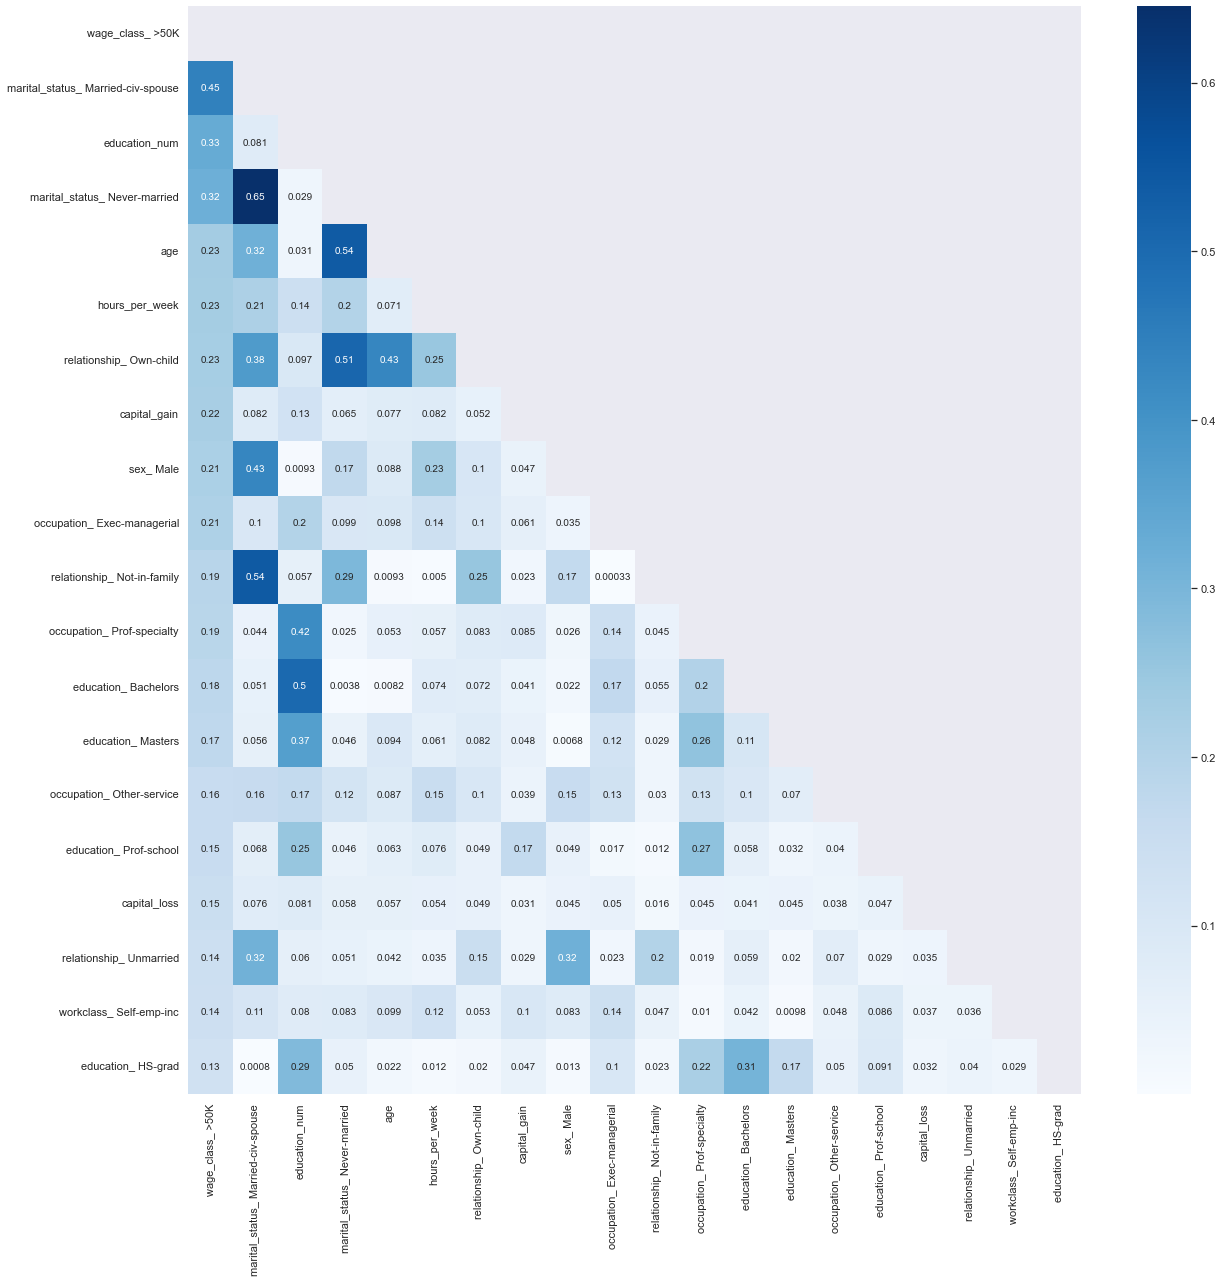

In [31]:
# absolute value of corr (for ranking purposes)
plt.figure(figsize=(20, 20))
sns.heatmap(abs(corr_top_20), annot=True, cmap="Blues", fmt='.2g', mask=upper_half_mask)
plt.show()

# Data Preparation

In [32]:
#XGBoost will take into account feature importance when training...skip feature selection
col_y, cols_x

('wage_class_ >50K',
 ['age',
  'fnlwgt',
  'education_num',
  'capital_gain',
  'capital_loss',
  'hours_per_week',
  'workclass_ Federal-gov',
  'workclass_ Local-gov',
  'workclass_ Never-worked',
  'workclass_ Private',
  'workclass_ Self-emp-inc',
  'workclass_ Self-emp-not-inc',
  'workclass_ State-gov',
  'workclass_ Without-pay',
  'education_ 11th',
  'education_ 12th',
  'education_ 1st-4th',
  'education_ 5th-6th',
  'education_ 7th-8th',
  'education_ 9th',
  'education_ Assoc-acdm',
  'education_ Assoc-voc',
  'education_ Bachelors',
  'education_ Doctorate',
  'education_ HS-grad',
  'education_ Masters',
  'education_ Preschool',
  'education_ Prof-school',
  'education_ Some-college',
  'marital_status_ Married-AF-spouse',
  'marital_status_ Married-civ-spouse',
  'marital_status_ Married-spouse-absent',
  'marital_status_ Never-married',
  'marital_status_ Separated',
  'marital_status_ Widowed',
  'occupation_ Adm-clerical',
  'occupation_ Armed-Forces',
  'occupation

### Train-test Split

In [33]:
data = adult_mod[cols_x]
data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48808,39,215419,13,0,0,36,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48809,64,321403,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48810,38,374983,13,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48811,44,83891,13,5455,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [34]:
target = adult_mod[col_y]
target

0        0
1        0
2        0
3        0
4        0
        ..
48808    0
48809    0
48810    0
48811    0
48812    1
Name: wage_class_ >50K, Length: 48813, dtype: uint8

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.20, random_state= 355)
X_train, y_train, X_test, y_test

(       age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
 4153    47  175958             13          3325             0              60   
 15011   62  272209              9             0             0              99   
 24950   38  133454             12             0             0              40   
 33737   49  169515              6             0             0              40   
 35662   33  171889              9             0             0              43   
 ...    ...     ...            ...           ...           ...             ...   
 30975   29  107108             10             0             0              40   
 26675   22  230704             12             0             0              20   
 7459    32  148138             13             0          2002              40   
 24053   30  345705             10             0             0              40   
 19074   61  176731              9             0             0              40   
 
        workcl

# Modeling (XGBoost)

In [36]:
# fit model on training data
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
# checking training accuracy
y_pred_train = xgb.predict(X_train)
predictions_train = [round(value) for value in y_pred_train] #>= 0.5 rounded to 1, < 0.5 rounded to 0
acc_train = accuracy_score(y_train, predictions_train)
acc_train

0.8959539052496799

In [38]:
# checking initial test accuracy
y_pred_test = xgb.predict(X_test)
predictions_test = [round(value) for value in y_pred_test] #>= 0.5 rounded to 1, < 0.5 rounded to 0
acc_test = accuracy_score(y_test, predictions_test)
acc_test

0.8706340264263034

### Grid Search

In [39]:
# Now to increase the accuracy of the model, we'll do hyperparameter tuning using grid search
param_grid={
    'learning_rate':[1, 0.5, 0.1, 0.05],
    'max_depth': [3, 5, 10, 20],
    'n_estimators':[10, 50, 100, 200]
}

In [40]:
grid = GridSearchCV(XGBClassifier(objective='binary:logistic'), param_grid, verbose=3)

In [41]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.860 total time=   0.5s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.863 total time=   0.3s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.866 total time=   0.4s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.857 total time=   0.5s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.859 total time=   0.5s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.867 total time=   2.9s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.871 total time=   0.9s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.873 total time=   1.2s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.868 total time=   0.8s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.871 total time=   0.7s
[CV 1/5] END learn

[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.873 total time=   0.8s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.871 total time=   0.6s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.870 total time=   0.7s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.874 total time=   0.7s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.875 total time=   0.7s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.874 total time=   0.7s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.872 total time=   0.7s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.870 total time=   1.2s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.875 total time=   1.2s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.878 total time=   1.1s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estim

[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.868 total time=   1.2s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.875 total time=   1.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.874 total time=   1.2s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.872 total time=   1.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.869 total time=   1.2s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.853 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.859 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.851 total time=   0.3s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.852 total time=   0.3s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.848 total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimato

[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=10;, score=0.815 total time=   0.4s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=10;, score=0.813 total time=   0.4s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=10;, score=0.817 total time=   0.3s
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=50;, score=0.858 total time=   0.9s
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=50;, score=0.866 total time=   0.9s
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=50;, score=0.864 total time=   0.8s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=50;, score=0.858 total time=   0.8s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=50;, score=0.858 total time=   0.8s
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=100;, score=0.865 total time=   1.1s
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=100;, score=0.871 total time=   1.1s
[CV 3/5] END learning_rate=0.05, max_depth=5, n_

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [1, 0.5, 0.1, 0.05],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [42]:
# to find the parameters that give maximum accuracy
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [43]:
# create new model using those same parameters
xgb_optimal = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=200)
xgb_optimal.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
# checking training accuracy for optimized model
y_pred_train1 = xgb_optimal.predict(X_train)
predictions_train1 = [round(value) for value in y_pred_train1] #>= 0.5 rounded to 1, < 0.5 rounded to 0
acc_train1 = accuracy_score(y_train, predictions_train1)
acc_train1

0.8853777208706786

In [45]:
# checking test accuracy for optimized model
y_pred_test1 = xgb_optimal.predict(X_test)
predictions_test1 = [round(value) for value in y_pred_test1] #>= 0.5 rounded to 1, < 0.5 rounded to 0
acc_test1 = accuracy_score(y_test, predictions_test1)
acc_test1
# As we have increased the accuracy of the model, we'll save this model

0.8739117074669671

### Feature Importances

In [46]:
feature_importances = xgb_optimal.feature_importances_
feature_importances
# not sorted (aligned with col names)

array([0.0129127 , 0.00287953, 0.06854584, 0.0445301 , 0.02035092,
       0.01146377, 0.01008174, 0.00562426, 0.        , 0.0031515 ,
       0.00423839, 0.00786122, 0.00447756, 0.00130851, 0.00410042,
       0.0014246 , 0.00105316, 0.00215728, 0.00297034, 0.00117249,
       0.0029633 , 0.00221725, 0.00298559, 0.        , 0.00194763,
       0.00470255, 0.        , 0.00495033, 0.00229325, 0.00652326,
       0.4375391 , 0.0033577 , 0.00646691, 0.00124658, 0.00492851,
       0.00234313, 0.        , 0.00279316, 0.03892697, 0.01739559,
       0.01364923, 0.00841033, 0.03041953, 0.00161848, 0.02474431,
       0.00686578, 0.00873511, 0.01024837, 0.00291155, 0.0057557 ,
       0.00842155, 0.03564071, 0.00305482, 0.00771802, 0.0047757 ,
       0.00356663, 0.00156528, 0.00493418, 0.01077049, 0.        ,
       0.00243977, 0.00349787, 0.00259506, 0.        , 0.00195584,
       0.        , 0.        , 0.00222873, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
cols_x

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital_status_ Married-AF-spouse',
 'marital_status_ Married-civ-spouse',
 'marital_status_ Married-spouse-absent',
 'marital_status_ Never-married',
 'marital_status_ Separated',
 'marital_status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupati

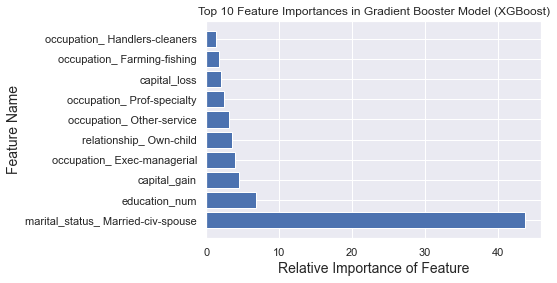

In [48]:
#plot_importance(xgb_optimal) #too many features to plot with this built-in method
feature_importances_graph = 100*feature_importances / np.sum(feature_importances)
feature_importances_graph_sorted, feature_names, feature_idxs = zip(*list(reversed(sorted(zip(feature_importances_graph, cols_x, range(len(cols_x)))))))

width = 0.8

idx = np.arange(len(cols_x))
plt.barh(idx[:10], feature_importances_graph_sorted[:10], align='center')
plt.yticks(idx[:10], feature_names[:10])

plt.title("Top 10 Feature Importances in Gradient Booster Model (XGBoost)")
plt.xlabel('Relative Importance of Feature', fontsize=14)
plt.ylabel('Feature Name', fontsize=14)
plt.show()
# plt.savefig('feature-importances.png', bbox_inches='tight')

# Save Model

In [49]:
#save model
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_optimal, f)